# Black Friday Sales Prediction

Black Friday is the day after Thanksgiving. Retailers typically offer steep discounts on Black Friday to kick off the holiday season.Black friday is the one of the most profitable days for all the retailers and for the buyers too.

All the retailers' goal is to attract more and more customers for black friday deals. This is like a competition for them to get the customers to thiers online platforms or physical retail stores.

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] =[8,8]

In [2]:
train = pd.read_csv('Black_Friday_train.csv')
test = pd.read_csv('Black_Friday_test.csv')
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### EDA (Exploratory Data Analysis)

In [3]:
train.shape

(550068, 12)

In [4]:
test.shape

(233599, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


##### Handle Missing Values

In [7]:
t=train.isnull().sum()
t

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
test_1 = test.copy()
test_1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
tes=test_1.isnull().sum()
tes

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [10]:
train[['Product_Category_2', 'Product_Category_3']].describe()

,Product_Category_2,Product_Category_3
count,376430.000000,166821.000000
mean,9.842329,12.668243
std,5.086590,4.125338
min,2.000000,3.000000
25%,5.000000,9.000000
50%,9.000000,14.000000
75%,15.000000,16.000000
max,18.000000,18.000000


In [11]:
median_2 = train.Product_Category_2.median()
train['Product_Category_2'].fillna(median_2,  inplace=True)

### As Product_Category_3 has more than 50% of null values, we have decided to drop  it.

In [12]:
train.drop('Product_Category_3',axis=1, inplace=True)

In [13]:
new = train.isnull().sum()
new

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [14]:
median_ = test_1.Product_Category_2.median()
test_1['Product_Category_2'].fillna(median_2,  inplace=True)

In [15]:
test_1.drop('Product_Category_3',axis=1, inplace=True)

In [16]:
new_test = test_1.isnull().sum()
new_test


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

# Data Visualization

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Product_Category_1'}>],
       [<AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Purchase'}>]], dtype=object)

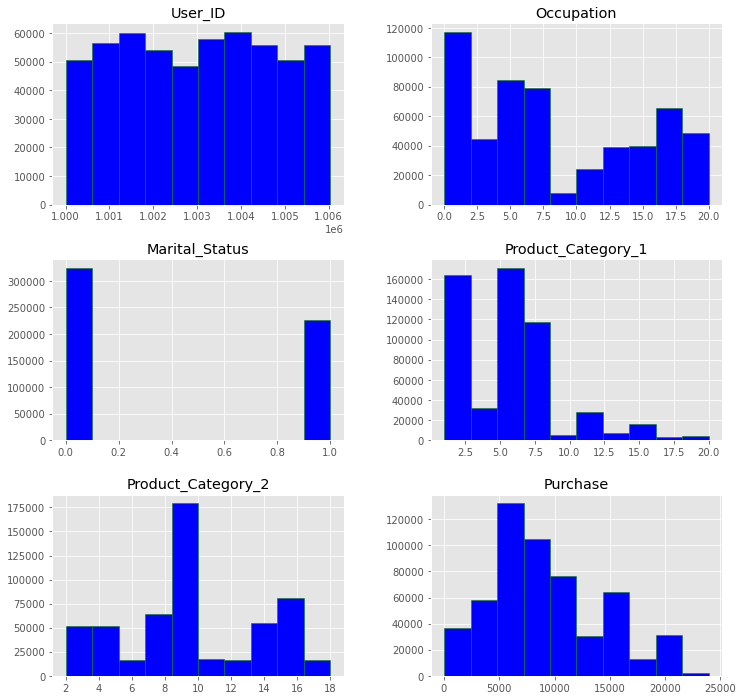

In [17]:
train.hist(edgecolor='green',figsize=(12,12), color='blue')

<AxesSubplot:xlabel='Gender', ylabel='count'>

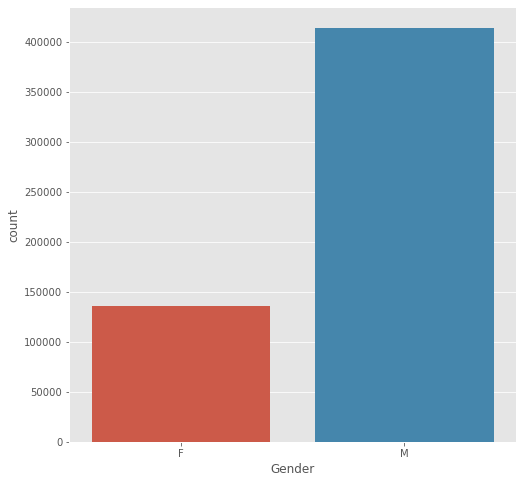

In [18]:
sns.countplot(x=train.Gender)

<AxesSubplot:ylabel='count'>

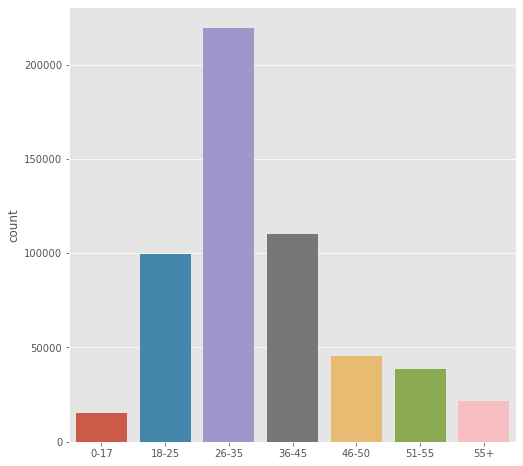

In [19]:
sns.countplot(x=sorted(train.Age))

<AxesSubplot:xlabel='Occupation', ylabel='count'>

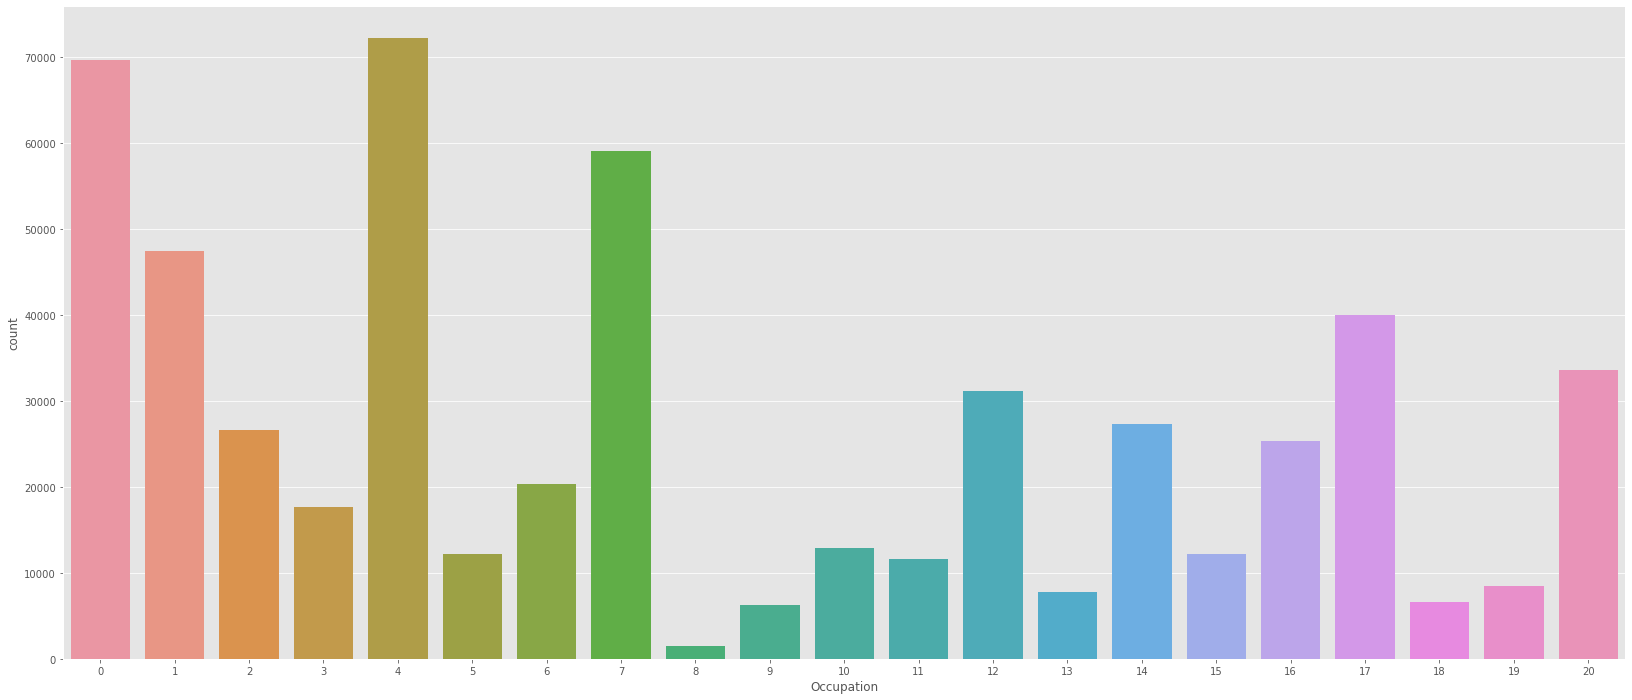

In [20]:
plt.rcParams['figure.figsize'] = (28, 12)
sns.countplot(x=train.Occupation)

<AxesSubplot:ylabel='count'>

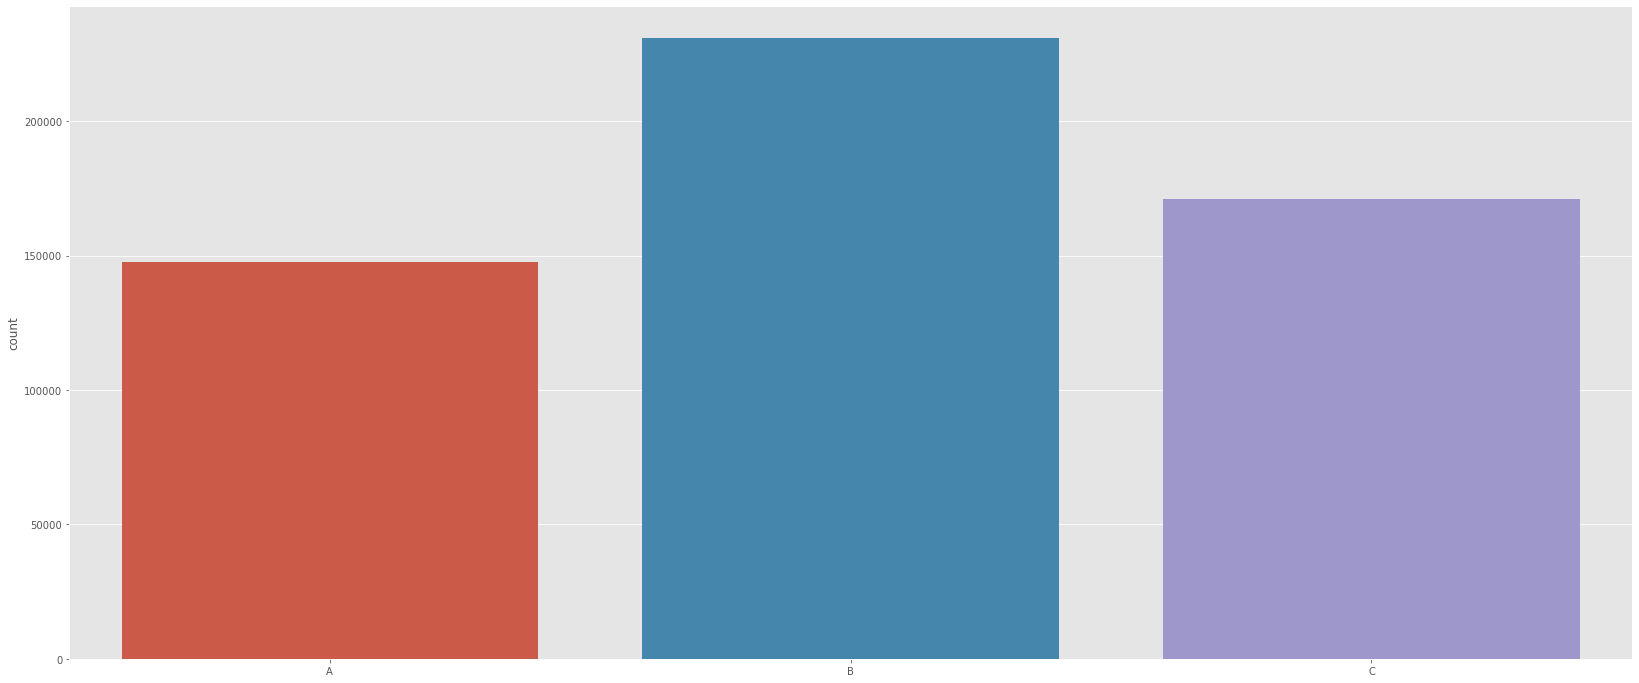

In [21]:
sns.countplot(x=sorted(train.City_Category))

<AxesSubplot:xlabel='Product_Category_1'>

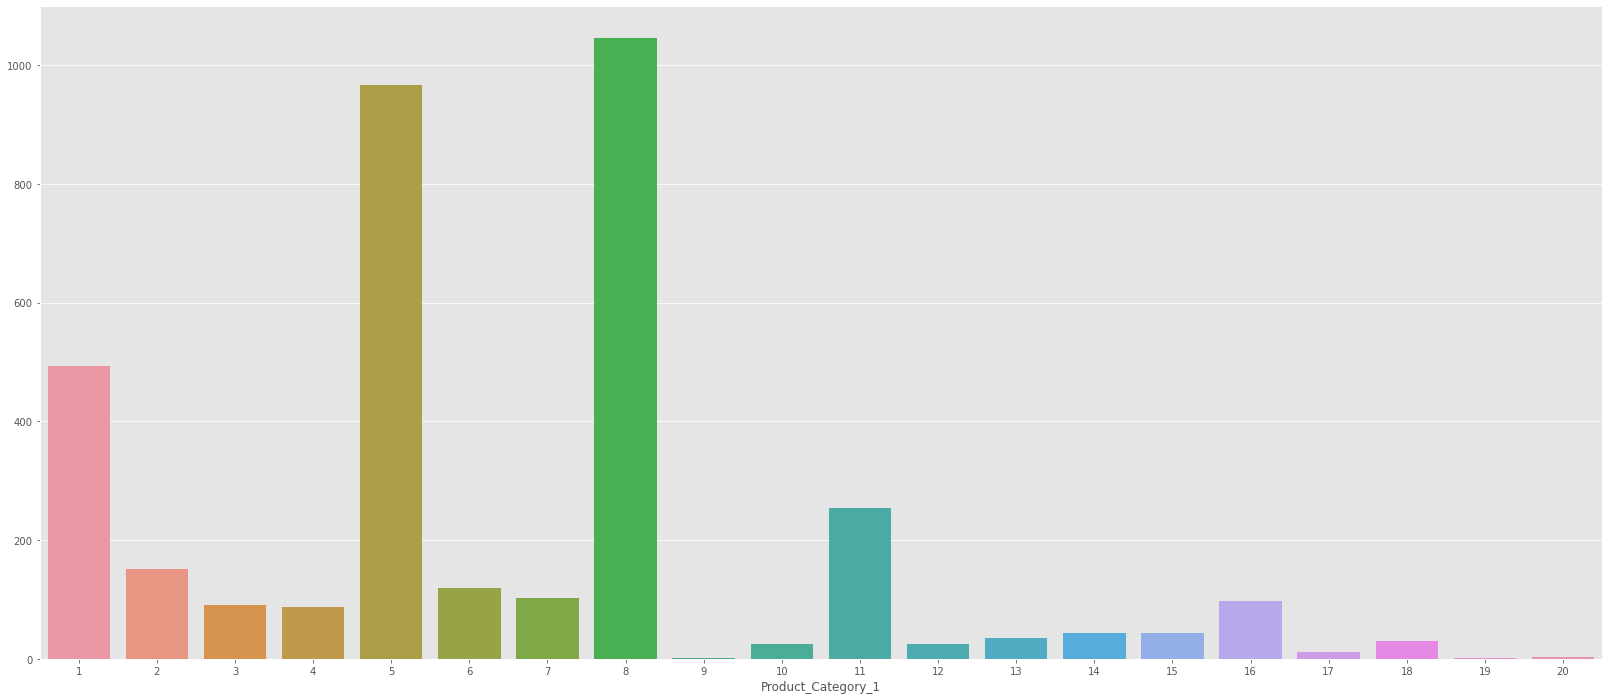

In [22]:
procd_cat= train.groupby('Product_Category_1')['Product_ID'].nunique()
ax = sns.barplot(x=procd_cat.index, y=procd_cat.values)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+10))

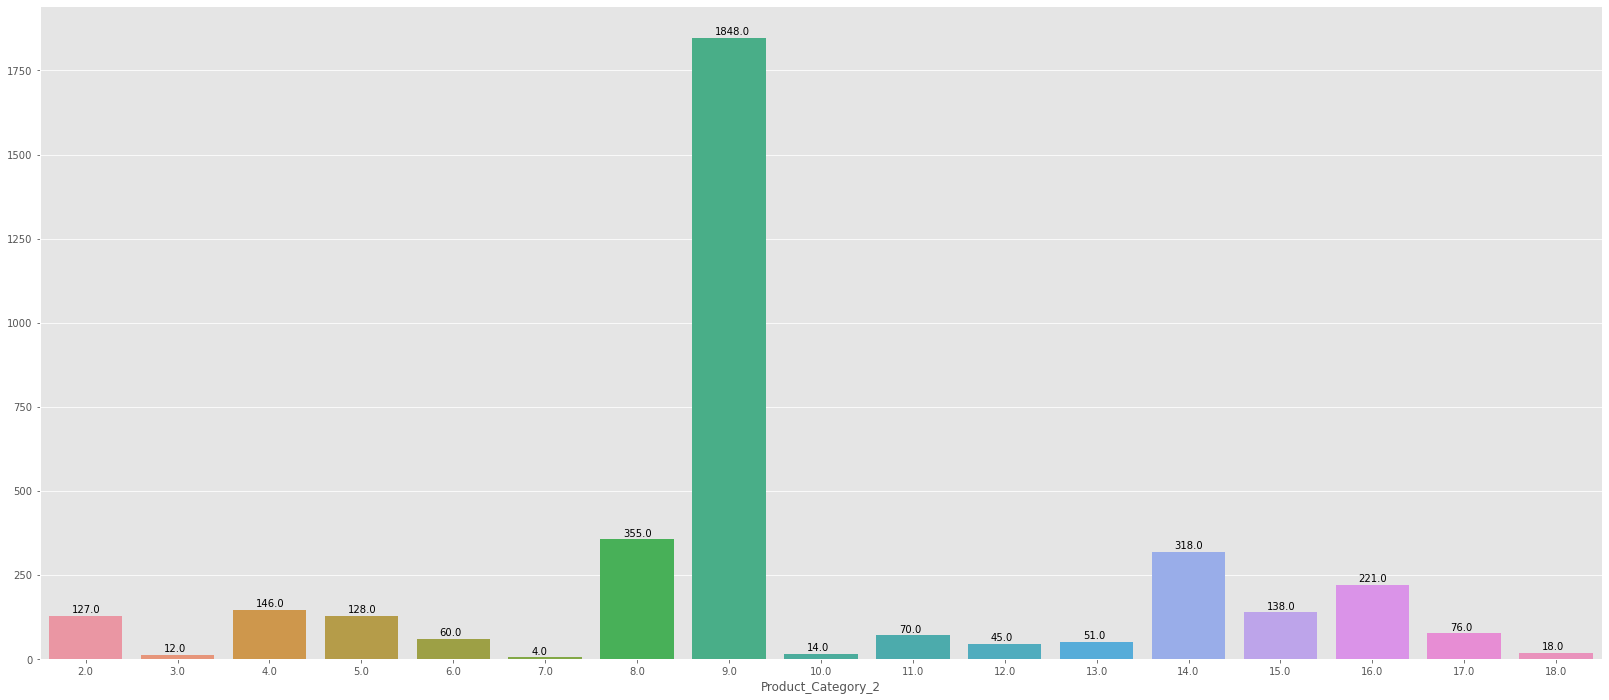

In [23]:
procd_cat2= train.groupby('Product_Category_2')['Product_ID'].nunique()
ax=sns.barplot(x=procd_cat2.index, y=procd_cat2.values)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+10))

C:\Users\MICRON\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

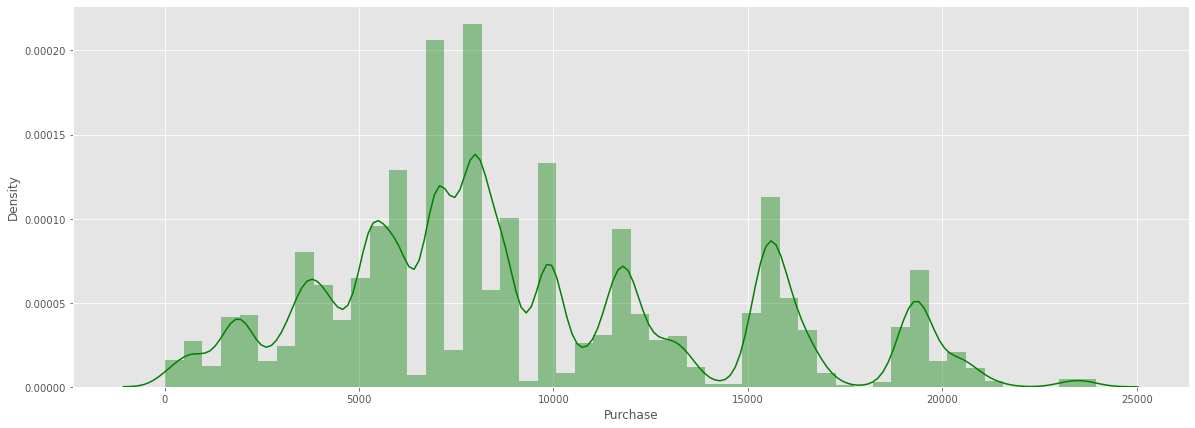

In [24]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(train['Purchase'], color = 'green')

In [25]:
train = train.drop(['Product_ID','User_ID'],axis=1)

In [26]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969


In [27]:
test_1 = test_1.drop(['Product_ID','User_ID'],axis=1)
test_1.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,M,46-50,7,B,2,1,1,11.0
1,M,26-35,17,C,0,0,3,5.0
2,F,36-45,1,B,4+,1,5,14.0
3,F,36-45,1,B,4+,1,4,9.0
4,F,26-35,1,C,1,0,4,5.0


In [28]:
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

train_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

train_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [29]:
train_final = train_final.drop(['Gender','Age', 'City_Category',  'Stay_In_Current_City_Years'], axis=1)

In [30]:
train_final.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,...,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,9.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [31]:
df_Gender = pd.get_dummies(test_1['Gender'])
df_Age = pd.get_dummies(test_1['Age'])
df_City_Category = pd.get_dummies(test_1['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(test_1['Stay_In_Current_City_Years'])

test_1_final= pd.concat([test_1, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

test_1_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,F,M,...,51-55,55+,A,B,C,0,1,2,3,4+
0,M,46-50,7,B,2,1,1,11.0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,M,26-35,17,C,0,0,3,5.0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,F,36-45,1,B,4+,1,5,14.0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,F,36-45,1,B,4+,1,4,9.0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,F,26-35,1,C,1,0,4,5.0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [32]:
test_1_final = test_1_final.drop(['Gender','Age', 'City_Category',  'Stay_In_Current_City_Years'], axis=1)
test_1_final.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,F,M,0-17,18-25,26-35,36-45,...,51-55,55+,A,B,C,0,1,2,3,4+
0,7,1,1,11.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,17,0,3,5.0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,1,1,5,14.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1,1,4,9.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,1,0,4,5.0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [34]:
X=train_final.drop('Purchase',axis=1)
y=train_final.Purchase

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)

In [37]:
lr.fit(X_train,y_train)
lr.score(X_test, y_test)


0.12503902586128912

In [38]:
predictions = lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 3590.5939644771224


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
print("Test R-2 Score -> {}".format(r2_score(y_test, predictions)))

Test R-2 Score -> 0.12503902586128912


## K Neighbors Regression

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 7)
knnreg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [41]:
y_pred_test = knnreg.predict(X_test)

In [42]:
print("Test R-2 Score -> {}".format(r2_score(y_test, y_pred_test)))

Test R-2 Score -> 0.5806754063989332


In [43]:
knnreg.score(X_test, y_test)

0.5806754063989332

#### Finding best value of k.

In [44]:
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsRegressor(n_neighbors = n).fit(X_train,y_train)
    mean_acc[n-1] = neigh.score(X_test, y_test)

print(mean_acc)

[0.32061696 0.48124871 0.52976633 0.5542124  0.56777159 0.57552229
 0.58067541 0.58433152 0.58597493]


In [45]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5859749310704332 with k= 9


## DecisionTree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=7,
                            min_samples_split=5,
                           max_leaf_nodes=10,
                            min_samples_leaf=2,
                            random_state=142)

In [47]:
dtr.fit(X_train,y_train)
y_pred_test = dtr.predict(X_test)
print("Test R-2 Score -> {}".format(r2_score(y_test,y_pred_test)))

Test R-2 Score -> 0.6151249212697111


In [48]:
from sklearn.tree import export_graphviz
export_graphviz(dtr, out_file ='tree.dot', 
               feature_names = X.columns) 

In [49]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

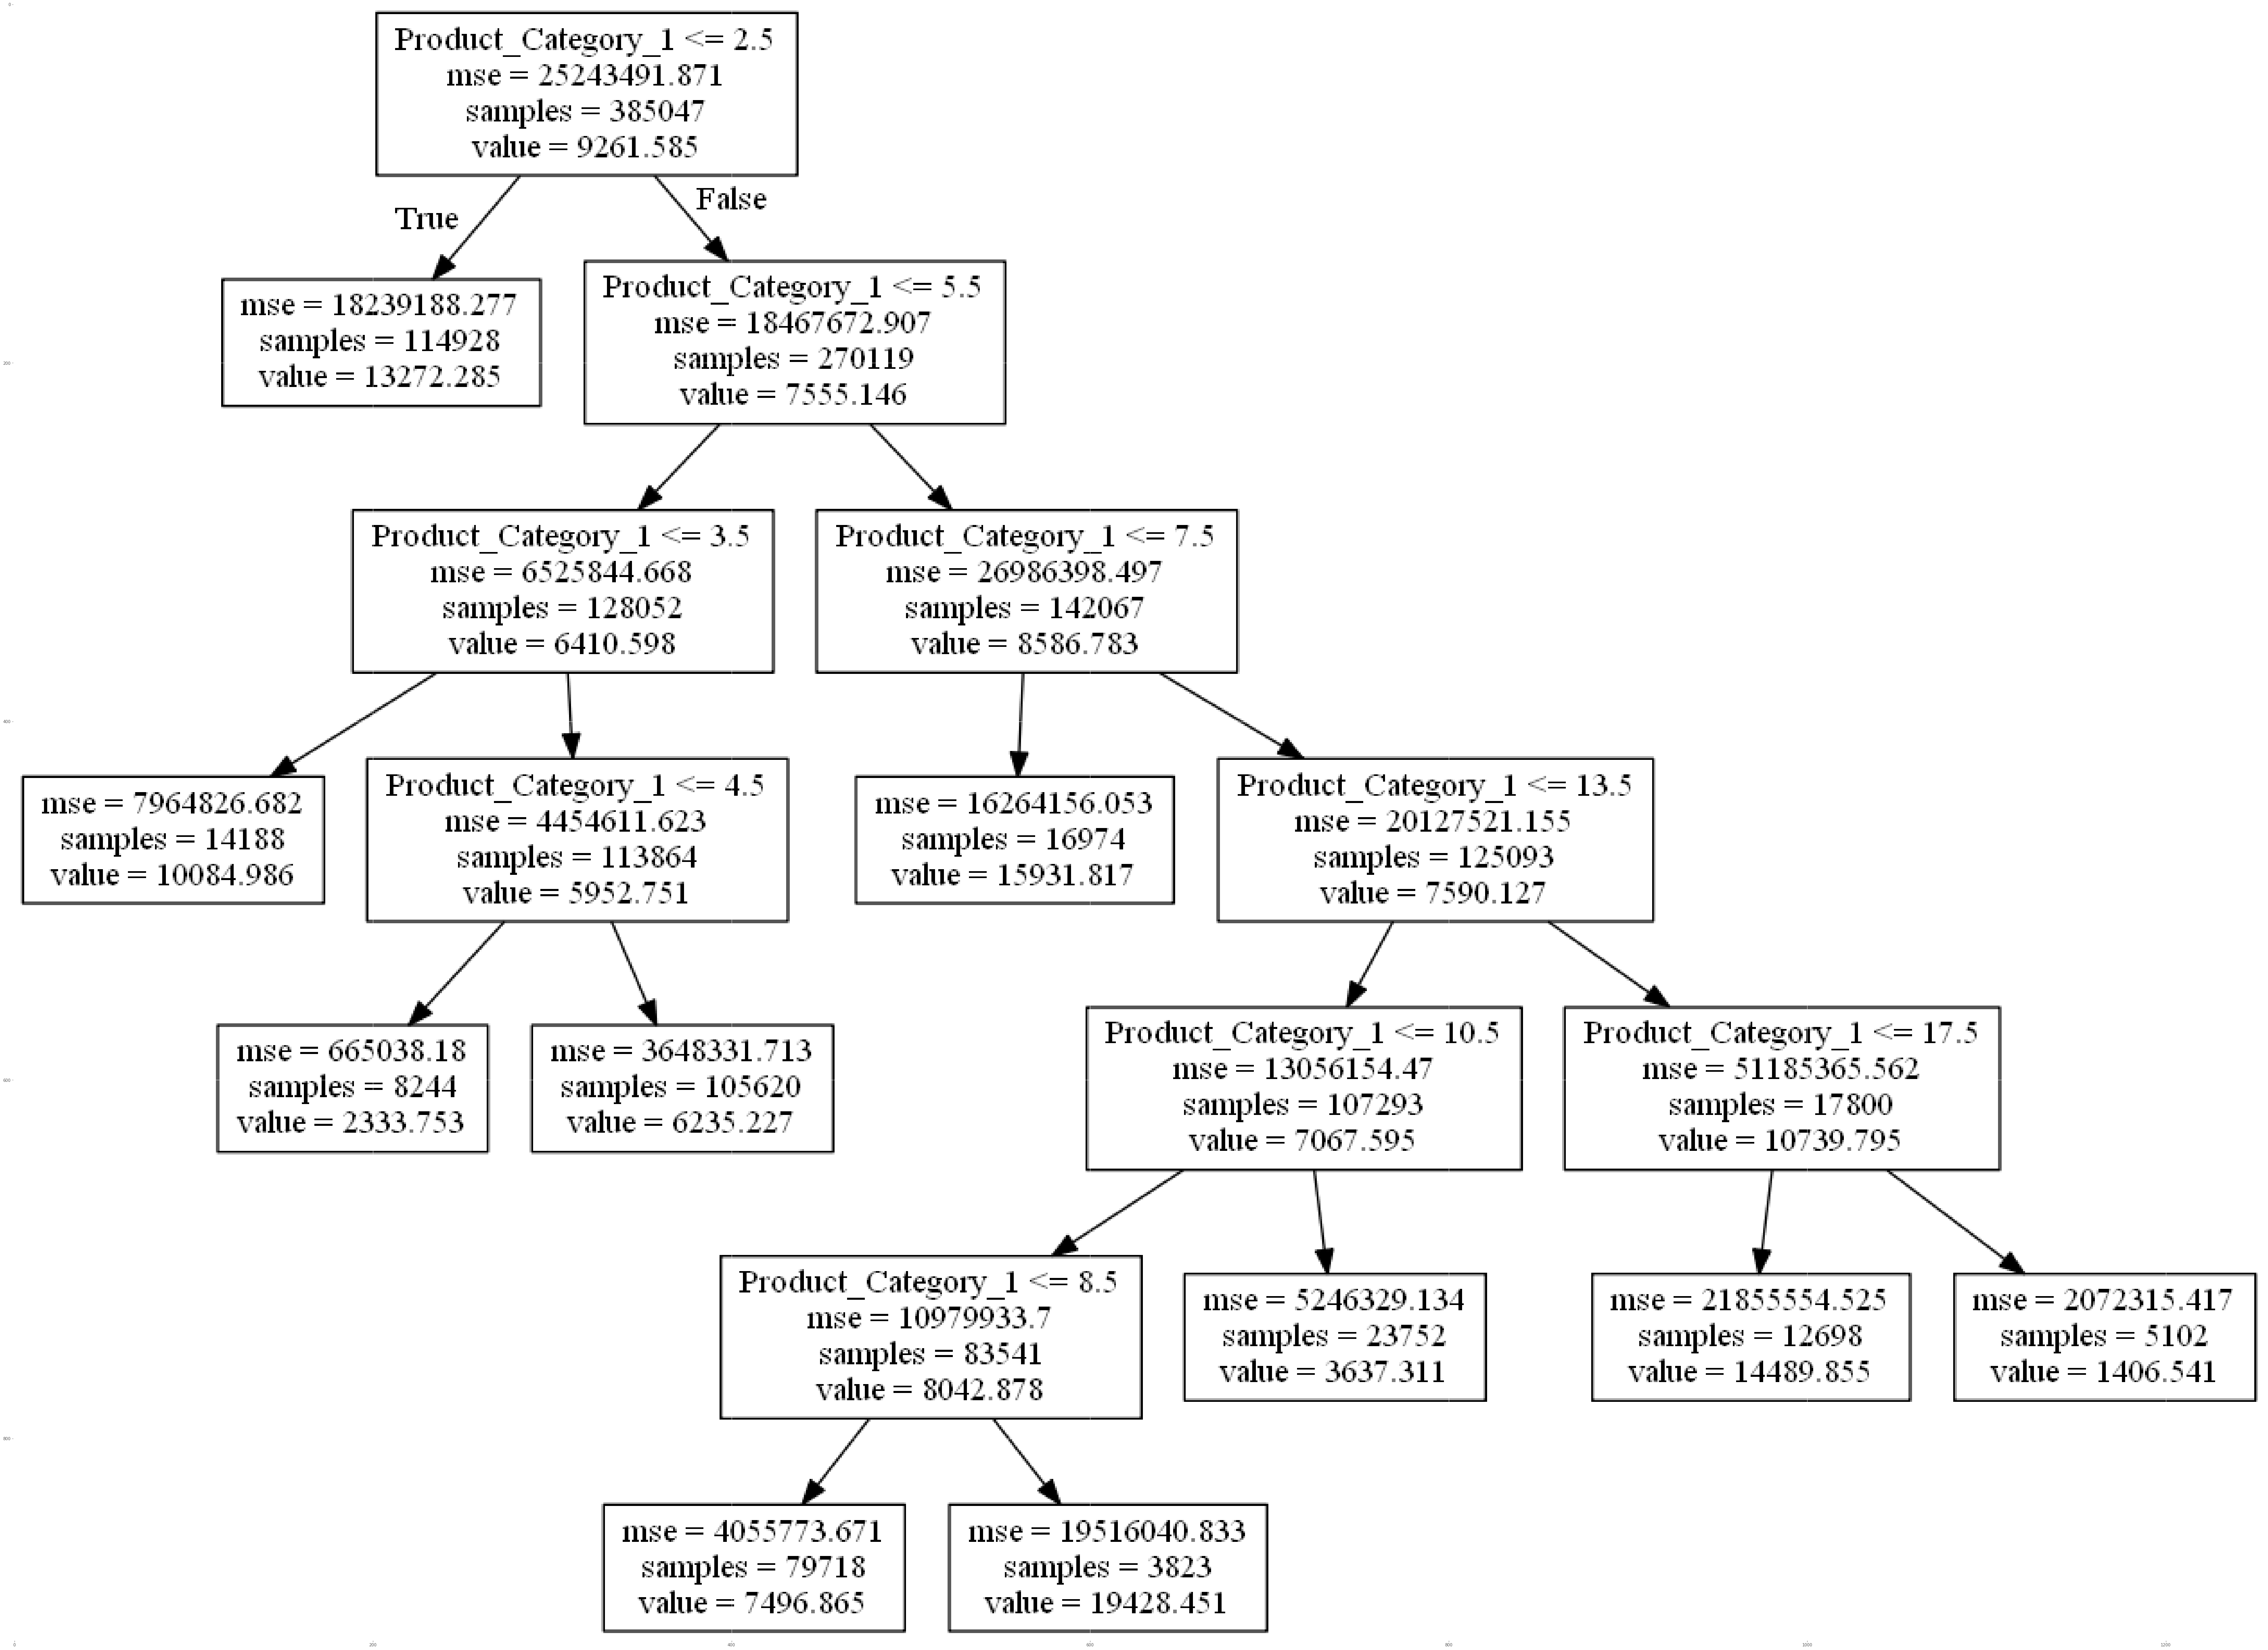

In [50]:
dot_data = StringIO()
filename = "dtree.png"
featureNames = X.columns
targetNames = train_final["Purchase"].unique().tolist()
out=tree.export_graphviz(dtr,feature_names=featureNames, out_file=dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

##### We are going to use Decision Tree Regression as it give better r^2 score than Linear Regression and K Neighbors Regression

##### Predicting Purchase for test data  and save it as csv file

In [51]:
prec = dtr.predict(test_1_final)
prec

array([13272.28489141, 10084.98639696,  6235.2265196 , ...,
       13272.28489141, 19428.45069317,  2333.75339641])

In [54]:
test['Purchase'] =  prec
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,13272.284891
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,10084.986397
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6235.226520
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2333.753396
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2333.753396


In [56]:
test.to_csv("test_prediction.csv")

#### We have visualized the data and trained the model with different types of machine learning models to predict the purchase amount that user might spend on next black friday.  Retailers now have analysis reports and a trained model. Retailers can apply different types marketing strategis. 